### Importing the necessary libraries and reading the data

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns  
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

seed = 42
N_SPLITS = 5
N_REPEATS = 1

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold
from sklearn.base import clone

from sklearn.linear_model import LinearRegression, Ridge

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [45]:
print(df_train.shape)
print(df_test.shape)

(1117957, 21)
(745305, 21)


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [48]:
df_train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [49]:
df_test.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [50]:
df_train.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [51]:
df_test.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [52]:
df_train.duplicated().sum()

0

In [53]:
df_test.duplicated().sum()

0

##### There are no duplicates/ null/ missing values in the train and test sets

### EDA

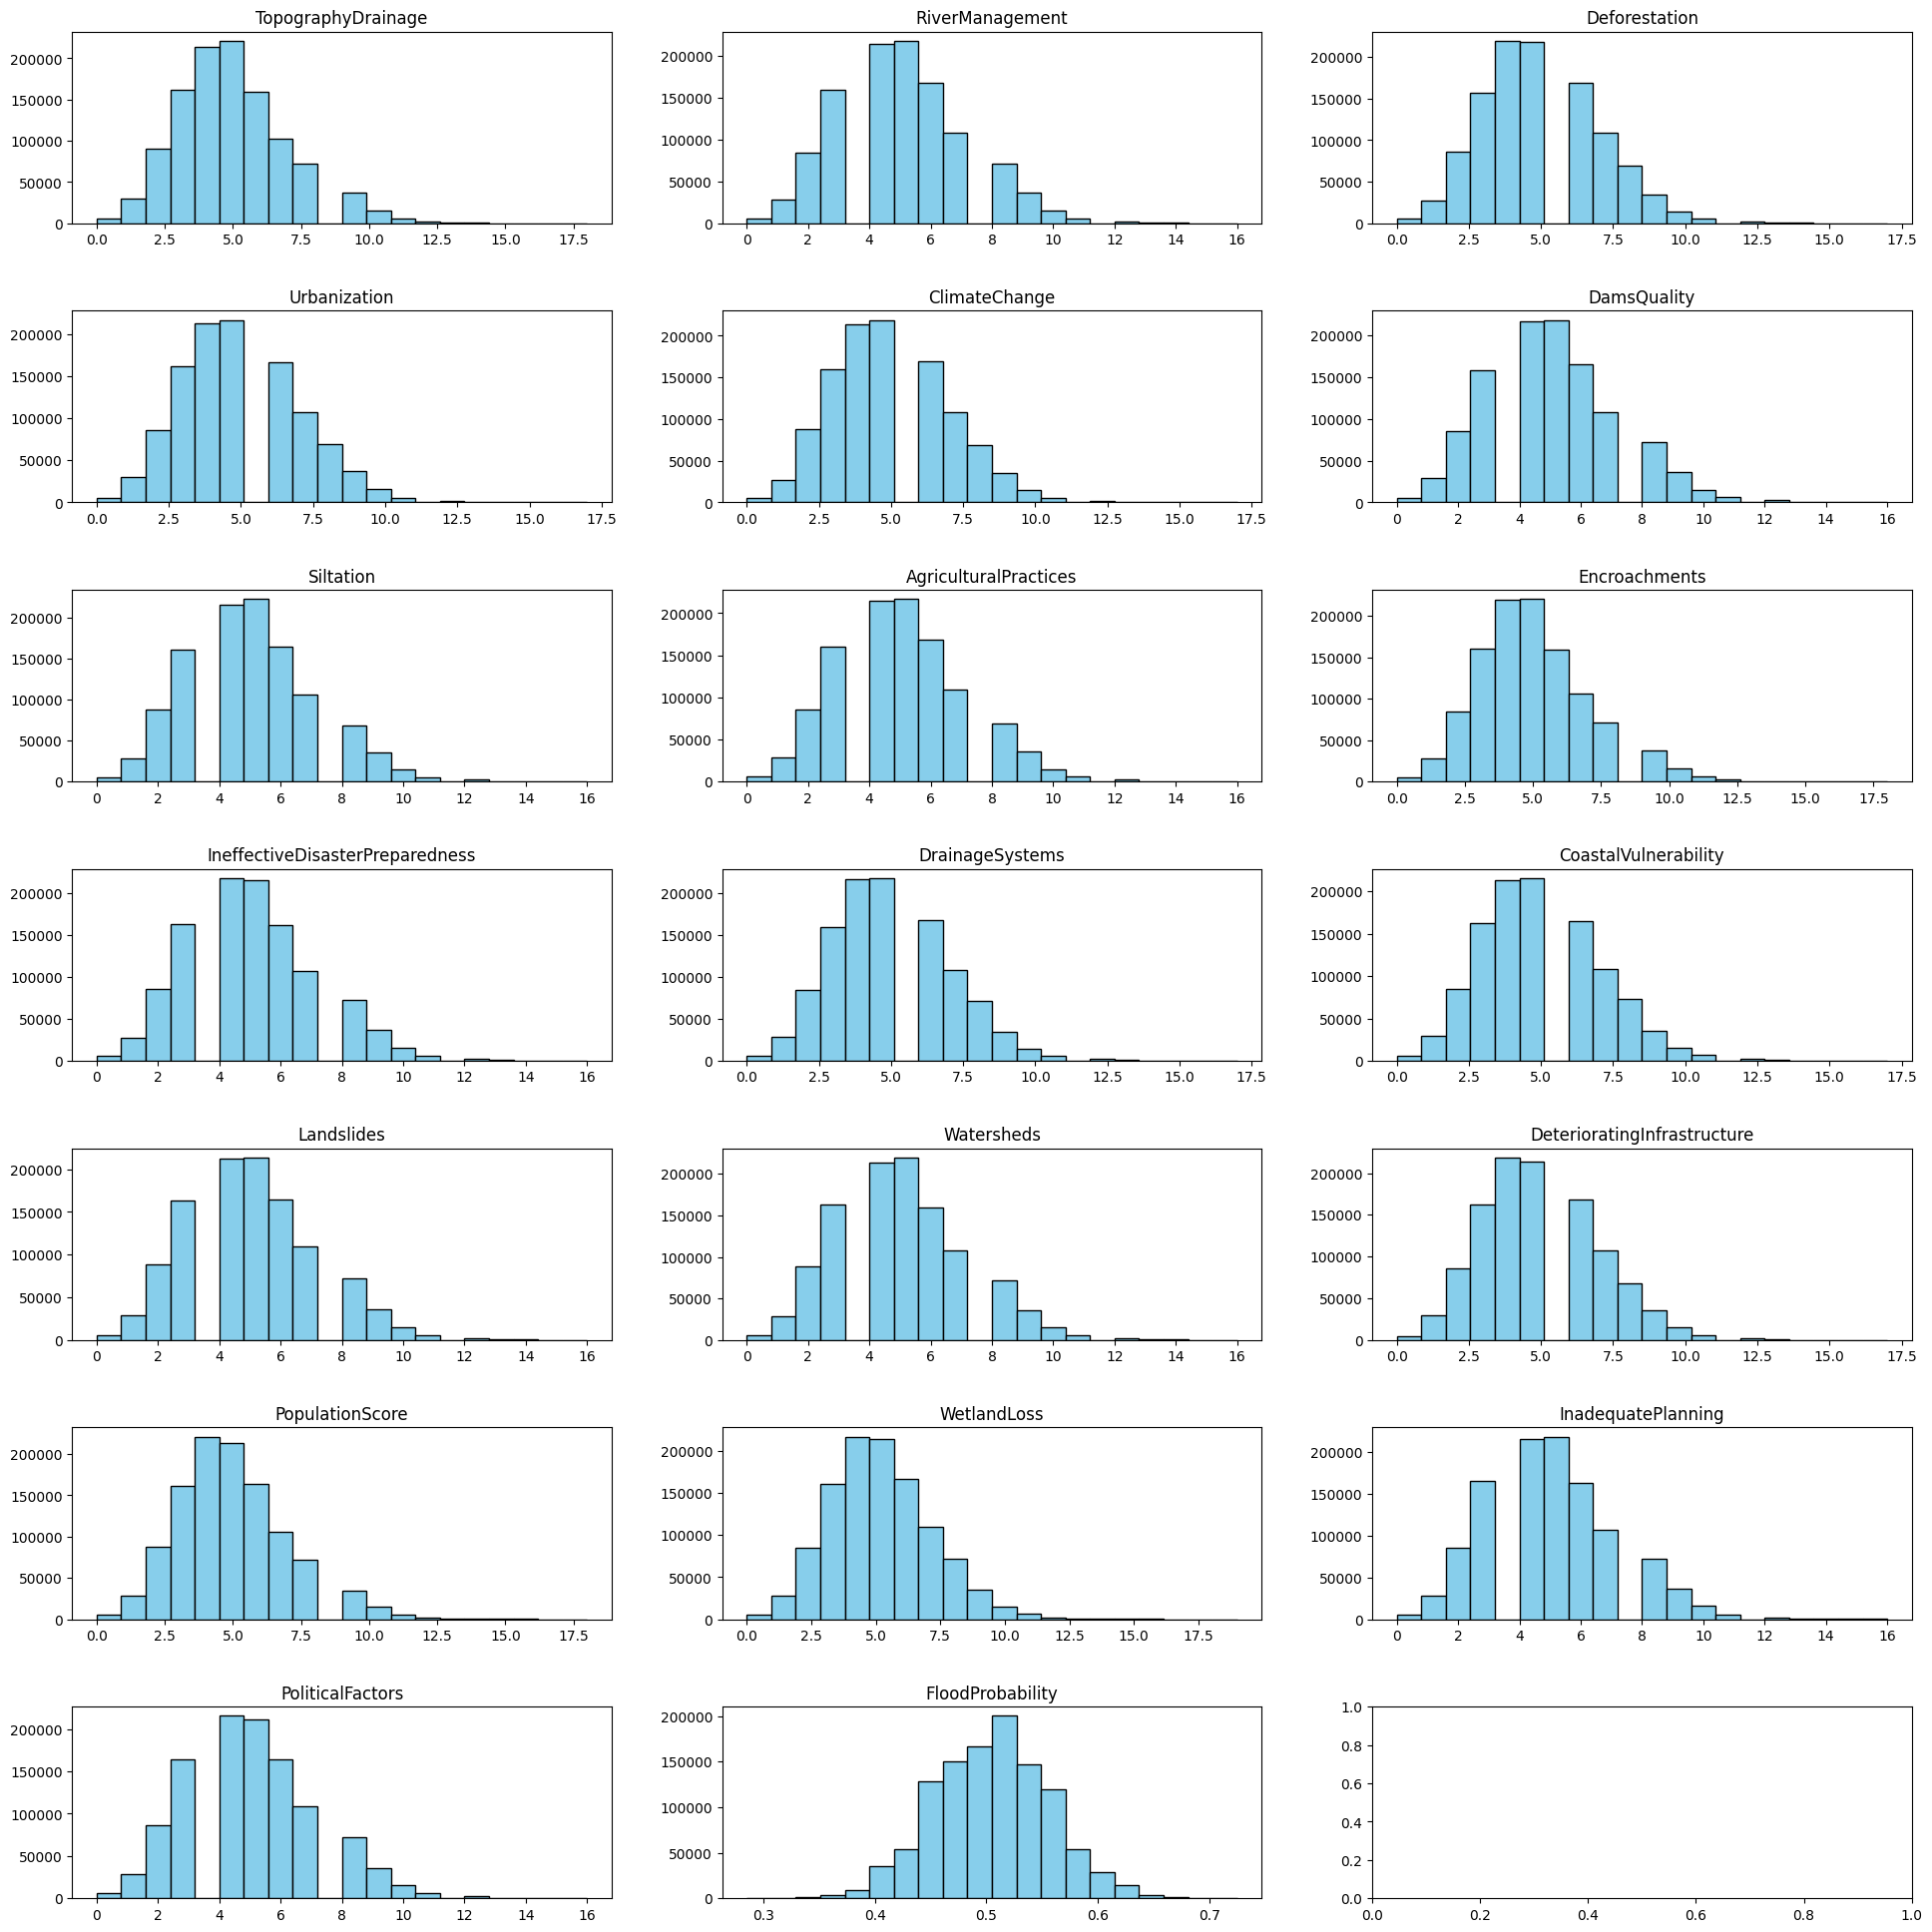

In [12]:
# histogram of the columns
fig, axs = plt.subplots(7, 3, figsize=(20, 20))
columns = df_train.columns[1:]

for i in range(7):
    for j in range(3):
        col_idx = i * 3 + j
        if col_idx < len(columns):
            axs[i, j].hist(df_train[columns[col_idx]], bins=20, color='skyblue', edgecolor='black')
            axs[i, j].set_title(columns[col_idx])

fig.tight_layout(pad=3)

#### Target distribution 

The target ranges from 0.285 to 0.725. There are only 83 unique targets (FloodProbability). All targets are multiples of 0.005. <br>
We plot a histogram with bins of width 0.005 so that every possible target value falls into its own bin. <br>
The histogram is symmetric and resembles a normal distribution with mean at 0.5.<br>

##### Thankyou [AmbrosM](https://www.kaggle.com/ambrosm) for teaching me this [technique](https://www.kaggle.com/code/ambrosm/pss4e5-eda-which-makes-sense?scriptVersionId=175337779&cellId=6)

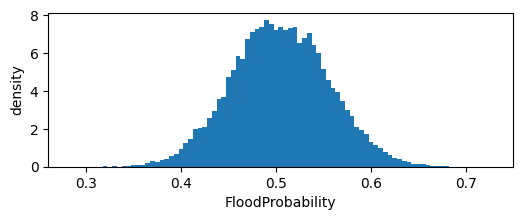

In [13]:
plt.figure(figsize=(6, 2))
plt.hist(df_train.FloodProbability, bins=np.linspace(0.2825, 0.7275, 90), density=True)
plt.ylabel('density')
plt.xlabel('FloodProbability')
plt.show()

<AxesSubplot: >

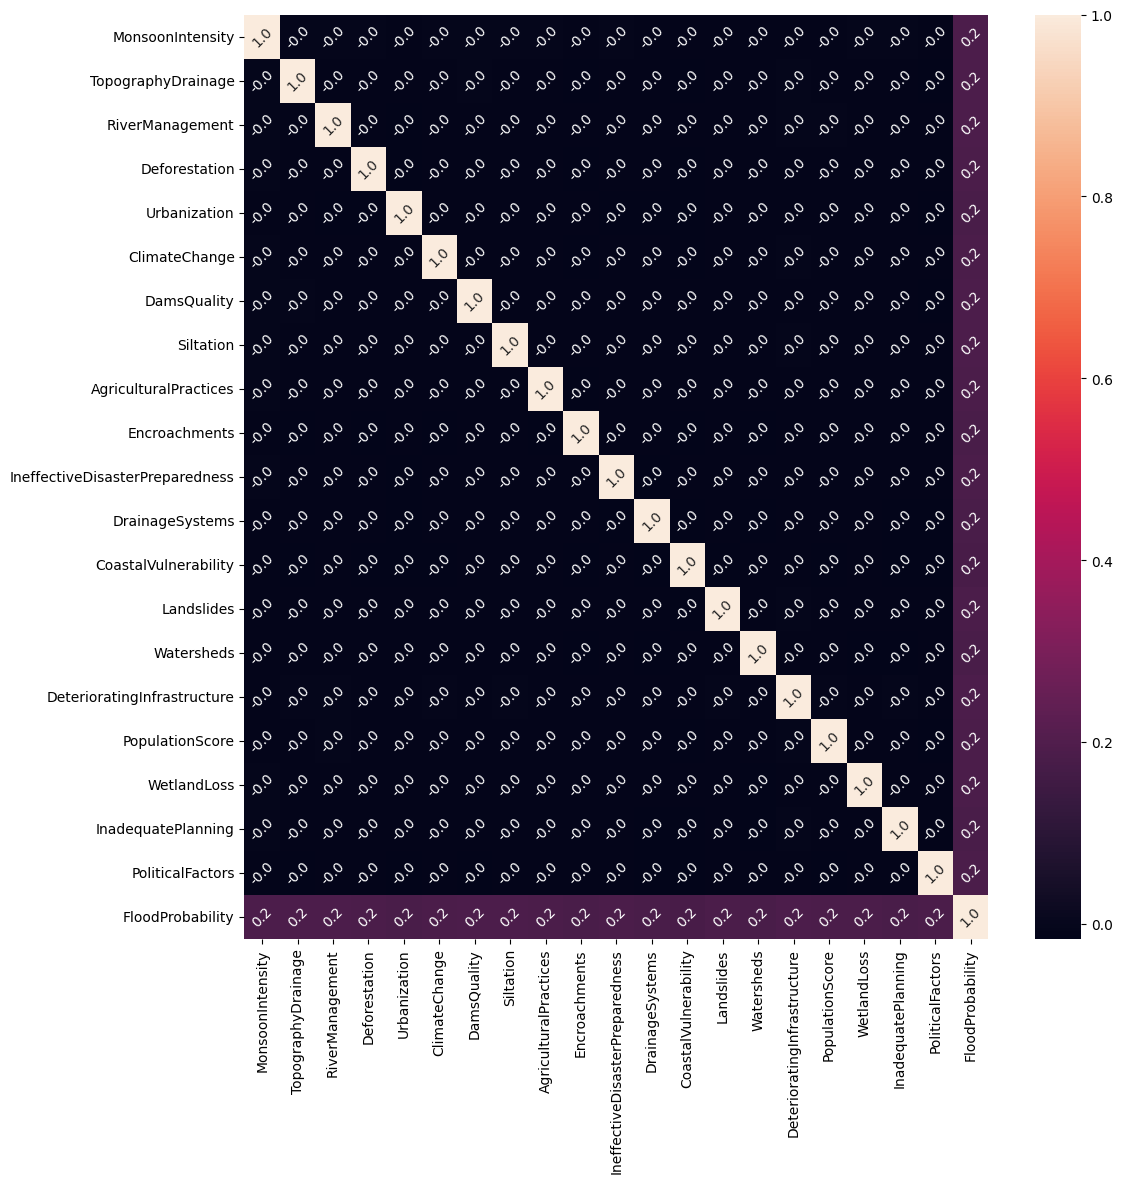

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap(df_train.corr(), annot = True, fmt = '.1f', annot_kws={'size': 10, 'rotation': 45})

# None of the features are correlated with each other
# All of the columns have almost equal correlation with the target column

### Feature Engineering

##### Learnt that the performance of the models can be improved when we calculate certian statistical features from [this post.](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499274)

##### Hence we can try out 3 different types of training sets -
1. Only Original Data
2. Only Statistical Features #This one works the best soo im using only stat features for this notebook, feel free to test out with others as well
3. Original Data + Statistical Features


In [58]:
cols = df_train.drop(columns='FloodProbability').columns
cols_test = df_test.drop(columns='id').columns


def add_stat_features(df, cols):
    df['Sum'] = df[cols].sum(axis = 1)   
    df['Variance'] = df[cols].var(axis = 1)
    df['Mean'] = df[cols].mean(axis = 1)
    df['Median'] = df[cols].median(axis = 1)
    df['Std'] = df[cols].std(axis = 1)
    df['Skewness'] = df[cols].skew(axis = 1)
    df['Kurtosis'] = df[cols].kurtosis(axis = 1)
    df['Product'] = df[cols].product(axis = 1)
    df['GeoMean'] = df[cols].apply(lambda x : np.exp(np.log(x).mean()), axis = 1)
    df['HarMean'] = df[cols].apply(lambda x : len(x) / np.sum(1.0/x), axis = 1)
    
    return df

add_stat_features(df_train, cols)
add_stat_features(df_test, cols_test)
df_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,Sum,Variance,Mean,Median,Std,Skewness,Kurtosis,Product,GeoMean,HarMean
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,7.315661e+12,3.681194e+24,1.314712e+23,4.75,6.952035e+23,5.023371,25.819794,8.115842e+112,4.031947e+07,5.265758
1,6,7,4,4,8,8,3,5,4,6,...,2.040601e+02,1.434439e+03,6.226020e+01,4.00,2.713391e+02,4.896143,24.861116,0.000000e+00,0.000000e+00,0.000000
2,6,5,6,7,3,7,1,5,4,5,...,1.008190e+13,6.991428e+24,2.496939e+23,5.00,1.320350e+24,5.023371,25.819794,1.531819e+114,4.916704e+07,4.925911
3,3,4,6,5,4,8,4,7,6,8,...,7.283147e+13,3.648545e+26,1.303052e+25,5.00,6.890377e+25,5.023371,25.819794,8.207285e+121,1.633331e+08,5.895104
4,5,3,2,6,4,4,3,3,3,3,...,2.015539e+10,2.794242e+19,9.979436e+17,3.00,5.277003e+18,5.023371,25.819794,4.688139e+89,1.089074e+06,3.773009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,4.551967e+12,1.425213e+24,5.090046e+22,4.00,2.691553e+23,5.023371,25.819794,9.554537e+110,2.985928e+07,4.621959
1117953,2,2,4,3,9,5,8,1,3,5,...,2.821755e+12,5.476715e+23,1.955970e+22,4.00,1.034293e+23,5.023371,25.819794,1.291491e+109,2.233510e+07,4.561011
1117954,7,3,9,4,6,5,9,1,3,4,...,9.185400e+12,5.803336e+24,2.072620e+23,5.00,1.095976e+24,5.023371,25.819794,6.625377e+113,4.646422e+07,4.953228


In [65]:
stat_cols = ['Sum', 'Variance', 'Mean', 'Median', 'Std', 'Skewness', 'Kurtosis', 'Product', 'GeoMean', 'HarMean']

df_train_stat_only = df_train[stat_cols]
df_train_stat_only = pd.concat([df_train_stat_only, df_train['FloodProbability']], axis = 1)

df_test_stat_only = df_test[stat_cols]


### Modelling

In [60]:
class evaluator:
    
    def __init__(self, model, X, y, n_splits=N_SPLITS, n_repeats=N_REPEATS):
        self.model = model
        self.X = X
        self.y = y
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        

    def fit(self):
        skf = KFold(n_splits=self.n_splits, random_state=seed, shuffle = True)
        out_of_fold_preds = np.zeros(self.X.shape[0])
        scores = []
        
        for train_index, test_index in skf.split(self.X,self.y):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            
            y_pred = np.zeros_like(y_test, dtype = float)
            
            for i in range(self.n_repeats):
                m = clone(self.model)
                m.fit(X_train, y_train) 
                y_pred += m.predict(X_test)
                
            y_pred /=self.n_repeats
            
            score = r2_score(y_test, y_pred)
            scores.append(score)
            
            print(f'Fold {i+1}, R2 score: {score:.4f}')
                        
            out_of_fold_preds[test_index] = y_pred
            
        return scores, out_of_fold_preds
    

#### Scenario 2 : Statistical Features Only

In [68]:
df_train_stat_only

,Sum,Variance,Mean,Median,Std,Skewness,Kurtosis,Product,GeoMean,HarMean,FloodProbability
id,,,,,,,,,,,
0,7.315661e+12,3.681194e+24,1.314712e+23,4.75,6.952035e+23,5.023371,25.819794,8.115842e+112,4.031947e+07,5.265758,0.445
1,2.040601e+02,1.434439e+03,6.226020e+01,4.00,2.713391e+02,4.896143,24.861116,0.000000e+00,0.000000e+00,0.000000,0.450
2,1.008190e+13,6.991428e+24,2.496939e+23,5.00,1.320350e+24,5.023371,25.819794,1.531819e+114,4.916704e+07,4.925911,0.530
3,7.283147e+13,3.648545e+26,1.303052e+25,5.00,6.890377e+25,5.023371,25.819794,8.207285e+121,1.633331e+08,5.895104,0.535
4,2.015539e+10,2.794242e+19,9.979436e+17,3.00,5.277003e+18,5.023371,25.819794,4.688139e+89,1.089074e+06,3.773009,0.415
...,...,...,...,...,...,...,...,...,...,...,...
1117952,4.551967e+12,1.425213e+24,5.090046e+22,4.00,2.691553e+23,5.023371,25.819794,9.554537e+110,2.985928e+07,4.621959,0.495
1117953,2.821755e+12,5.476715e+23,1.955970e+22,4.00,1.034293e+23,5.023371,25.819794,1.291491e+109,2.233510e+07,4.561011,0.480
1117954,9.185400e+12,5.803336e+24,2.072620e+23,5.00,1.095976e+24,5.023371,25.819794,6.625377e+113,4.646422e+07,4.953228,0.485


In [64]:
model_scores = {}
model_preds = {}

lgb = LGBMRegressor(verbose = -1)
cat = CatBoostRegressor(verbose = False)
xgb = XGBRegressor()

models = [lgb, cat, xgb]
for model in models:
    score , oofp = evaluator(model, df_train_stat_only.drop(columns = 'FloodProbability'), df_train_stat_only['FloodProbability']).fit()
    model_scores[model.__class__.__name__] = score
    model_preds[model.__class__.__name__] = oofp    
    print(f'{model.__class__.__name__}: {np.mean(score):.5f}')
    
'''###############################################################################
RESULT
###############################################################################

LGBMRegressor score for fold [      0       2       5 ... 1117951 1117954 1117955] is 0.8684962461978162
LGBMRegressor score for fold [      6       9      11 ... 1117950 1117953 1117956] is 0.868707924784828
LGBMRegressor score for fold [      1       3       4 ... 1117947 1117949 1117952] is 0.8683616737541584
LGBMRegressor: 0.86852
CatBoostRegressor score for fold [      0       2       5 ... 1117951 1117954 1117955] is 0.868681015622249
CatBoostRegressor score for fold [      6       9      11 ... 1117950 1117953 1117956] is 0.8688771971348085
CatBoostRegressor score for fold [      1       3       4 ... 1117947 1117949 1117952] is 0.8686258767076114
CatBoostRegressor: 0.86873
XGBRegressor score for fold [      0       2       5 ... 1117951 1117954 1117955] is 0.8684586685200721
XGBRegressor score for fold [      6       9      11 ... 1117950 1117953 1117956] is 0.8686080046411516
XGBRegressor score for fold [      1       3       4 ... 1117947 1117949 1117952] is 0.8683366265357537
XGBRegressor: 0.86847      
    '''

Fold 1, R2 score: 0.8466
Fold 1, R2 score: 0.8466
Fold 1, R2 score: 0.8462
Fold 1, R2 score: 0.8467
Fold 1, R2 score: 0.8466
LGBMRegressor: 0.84655
Fold 1, R2 score: 0.8486
Fold 1, R2 score: 0.8489
Fold 1, R2 score: 0.8483


KeyboardInterrupt: 

In [63]:
X = df_train_stat_only.drop(columns = 'FloodProbability')
y = df_train_stat_only['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = seed)

model = LGBMRegressor(verbose = -1)
model.fit(X_train, y_train)
y_pred_lgb = model.predict(X_test)
print(f'Acc for LGBMRegressor: {r2_score(y_test, y_pred_lgb)}')

model2 = CatBoostRegressor(verbose = False)
model2.fit(X_train, y_train)
y_pred_cat = model2.predict(X_test)
print(f'Acc for CatBoostRegressor: {r2_score(y_test, y_pred_cat)}')

model3 = XGBRegressor()
model3.fit(X_train, y_train)
y_pred_xgb = model3.predict(X_test)
print(f'Acc for XGBRegressor: {r2_score(y_test, y_pred_xgb)}')


Acc for LGBMRegressor: 0.8466000243323446


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import VotingRegressor

model_vote = VotingRegressor(estimators = [('lgb', model), ('cat', model2), ('xgb', model3)])
model_vote.fit(X_train, y_train)
y_pred = model_vote.predict(X_test)
print(f'Acc for VotingRegressor: {r2_score(y_test, y_pred)}')


Acc for VotingRegressor: 0.8686488001028735


In [ ]:
preds1 = model.predict(df_test_stat_only)
preds2 = model2.predict(df_test_stat_only)
preds3 = model3.predict(df_test_stat_only)

aggregate_preds = (preds1 + preds2 + preds3) / 3


CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [40]:
submission = pd.DataFrame({'id': df_test['id'], 'FloodProbability': aggregate_preds})
submission.to_csv('aggregate_submission.csv', index=False)
submission.head()

,id,FloodProbability
0,1117957,0.578070
1,1117958,0.454715
2,1117959,0.448639
3,1117960,0.467286
4,1117961,0.467274
